## <font size=5> <strong>Heart Disease Prediction 
 

## I. Importing essential libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.vscode', 'heart.csv', 'Heart_disease_prediction DM LAB.ipynb', 'README.md']


## II. Importing and understanding our dataset 

In [80]:
dataset = pd.read_csv("heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [81]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [4]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [5]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3,1
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1


#### Description

In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
###Luckily, we have no missing values

#### Let's understand our columns better:

In [10]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [11]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [12]:
dataset["target"].unique()

array([1, 0])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [13]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [14]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

target
1    165
0    138
Name: count, dtype: int64


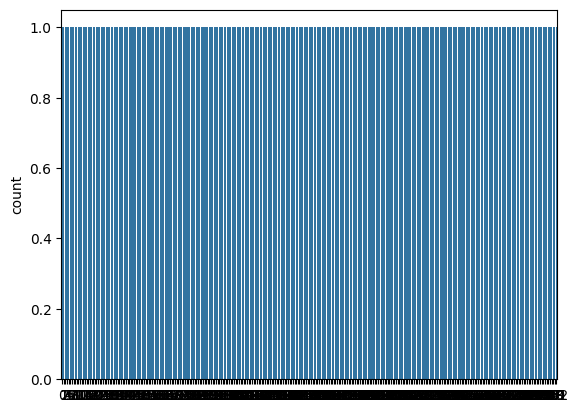

In [15]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [16]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [17]:
dataset["sex"].unique()

array([1, 0])

##### We notice, that as expected, the 'sex' feature has 2 unique features

<Axes: ylabel='sex'>

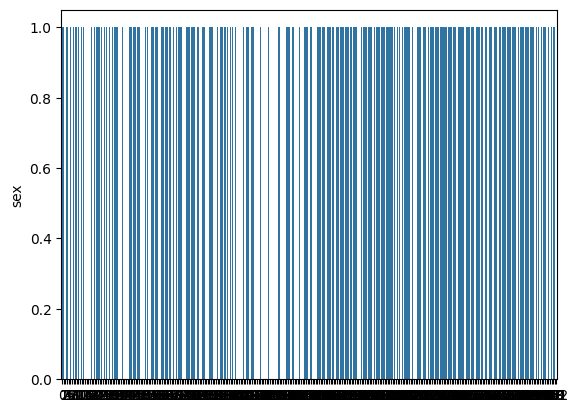

In [18]:
sns.barplot(dataset["sex"])

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [19]:
dataset["cp"].unique()

array([3, 2, 1, 0])

##### As expected, the CP feature has values from 0 to 3

<Axes: ylabel='cp'>

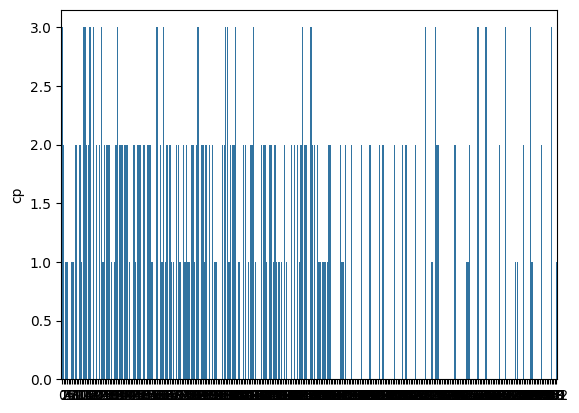

In [20]:
sns.barplot(dataset["cp"])

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [21]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [22]:
dataset["fbs"].unique()

array([1, 0])

<Axes: ylabel='fbs'>

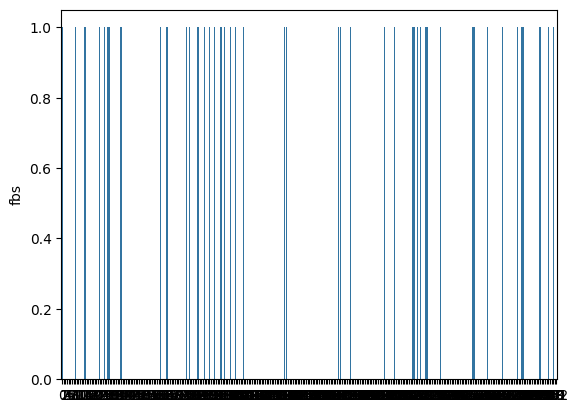

In [23]:
sns.barplot(dataset["fbs"])

##### Nothing extraordinary here

### Analysing the restecg feature

In [24]:
dataset["restecg"].unique()

array([0, 1, 2])

<Axes: ylabel='restecg'>

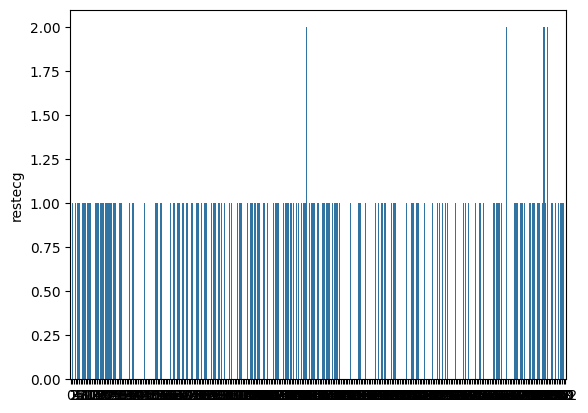

In [25]:
sns.barplot(dataset["restecg"])

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [26]:
dataset["exang"].unique()

array([0, 1])

<Axes: ylabel='exang'>

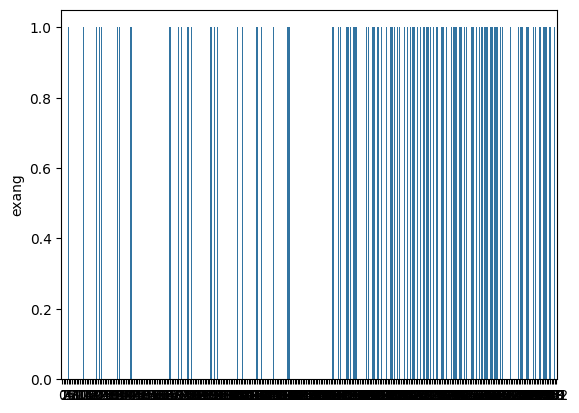

In [27]:
sns.barplot(dataset["exang"])

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [28]:
dataset["slope"].unique()

array([0, 2, 1])

<Axes: ylabel='slope'>

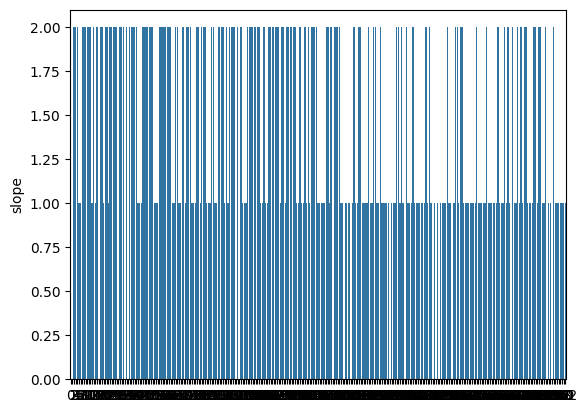

In [29]:
sns.barplot(dataset["slope"])

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [30]:
#number of major vessels (0-3) colored by flourosopy

In [31]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

<Axes: ylabel='count'>

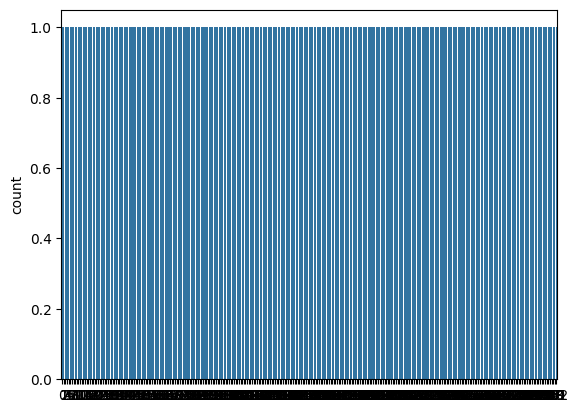

In [32]:
sns.countplot(dataset["ca"])

<Axes: ylabel='ca'>

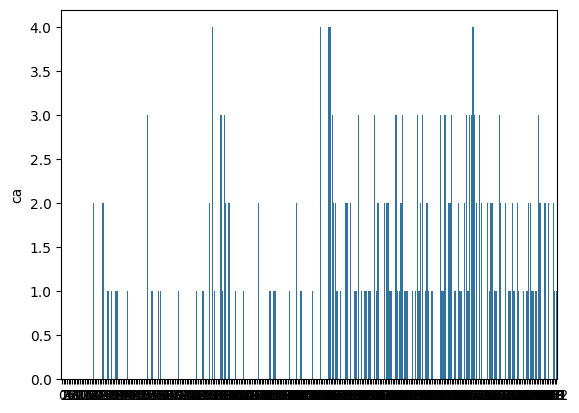

In [33]:
sns.barplot(dataset["ca"])

##### ca=4 has astonishingly large number of heart patients

In [34]:
### Analysing the 'thal' feature

In [35]:
dataset["thal"].unique()

array([1, 2, 3, 0])

<Axes: ylabel='thal'>

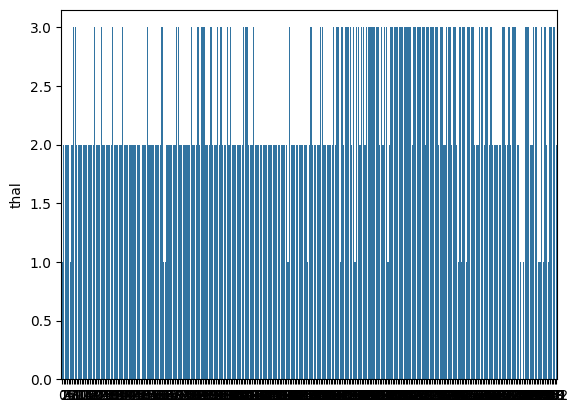

In [36]:
sns.barplot(dataset["thal"])

<Axes: xlabel='thal', ylabel='Density'>

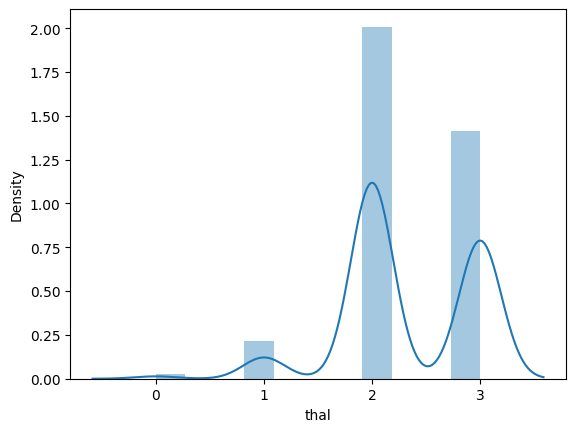

In [37]:
sns.distplot(dataset["thal"])

## IV. Train Test split

In [38]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [39]:
X_train.shape

(242, 13)

In [40]:
X_test.shape

(61, 13)

In [41]:
Y_train.shape

(242,)

In [42]:
Y_test.shape

(61,)

## V. Model Fitting

In [76]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Logistic Regression Model
lr = LogisticRegression(max_iter=1000)  # Increased iterations for better convergence
lr.fit(X_train, Y_train)

# Predictions
Y_pred_lr = lr.predict(X_test)

In [86]:
accuracy = round(accuracy_score(Y_test, Y_pred_lr) * 100, 2)
precision = round(precision_score(Y_test, Y_pred_lr) * 100, 2)
recall = round(recall_score(Y_test, Y_pred_lr) * 100, 2)
f1 = round(f1_score(Y_test, Y_pred_lr) * 100, 2)
score_lr = round(accuracy_score(Y_test, Y_pred_lr) * 100, 2)

In [87]:
print(f"Accuracy: {accuracy} %")
print(f"Precision: {precision} %")
print(f"Recall: {recall} %")
print(f"F1 Score: {f1} %")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_lr))

Accuracy: 85.25 %
Precision: 83.78 %
Recall: 91.18 %
F1 Score: 87.32 %

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:
 [[21  6]
 [ 3 31]]


### Naive Bayes

In [79]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Train Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, Y_train)

# Predictions
Y_pred_nb = nb.predict(X_test)


In [92]:
accuracy_nb = round(accuracy_score(Y_test, Y_pred_nb) * 100, 2)
precision_nb = round(precision_score(Y_test, Y_pred_nb, average='macro') * 100, 2)
recall_nb = round(recall_score(Y_test, Y_pred_nb, average='macro') * 100, 2)
f1_nb = round(f1_score(Y_test, Y_pred_nb, average='macro') * 100, 2)
conf_matrix_nb = confusion_matrix(Y_test, Y_pred_nb)
class_report_nb = classification_report(Y_test, Y_pred_nb)
score_nb = round(accuracy_score(Y_test, Y_pred_nb) * 100, 2)

In [93]:
print(f"Naive Bayes Classifier Results:")
print(f"Accuracy: {accuracy_nb}%")
print(f"Precision: {precision_nb}%")
print(f"Recall: {recall_nb}%")
print(f"F1 Score: {f1_nb}%")
print("\nConfusion Matrix:")
print(conf_matrix_nb)
print("\nClassification Report:")
print(class_report_nb)

Naive Bayes Classifier Results:
Accuracy: 85.25%
Precision: 85.64%
Recall: 84.48%
F1 Score: 84.84%

Confusion Matrix:
[[21  6]
 [ 3 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



### SVM

In [50]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Train the Linear SVM model
sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)

# Predict
Y_pred_svm = sv.predict(X_test)

In [94]:
accuracy_svm = round(accuracy_score(Y_test, Y_pred_svm) * 100, 2)
precision_svm = round(precision_score(Y_test, Y_pred_svm, average='macro') * 100, 2)
recall_svm = round(recall_score(Y_test, Y_pred_svm, average='macro') * 100, 2)
f1_svm = round(f1_score(Y_test, Y_pred_svm, average='macro') * 100, 2)
conf_matrix_svm = confusion_matrix(Y_test, Y_pred_svm)
class_report_svm = classification_report(Y_test, Y_pred_svm)
score_svm = round(accuracy_score(Y_test, Y_pred_svm) * 100, 2)


In [95]:
print("Linear SVM Classifier Results:")
print(f"Accuracy: {accuracy_svm}%")
print(f"Precision: {precision_svm}%")
print(f"Recall: {recall_svm}%")
print(f"F1 Score: {f1_svm}%")
print("\nConfusion Matrix:")
print(conf_matrix_svm)
print("\nClassification Report:")
print(class_report_svm)

Linear SVM Classifier Results:
Accuracy: 81.97%
Precision: 82.21%
Recall: 81.15%
F1 Score: 81.47%

Confusion Matrix:
[[20  7]
 [ 4 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.81      0.88      0.85        34

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



### K Nearest Neighbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# KNN Model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)

In [97]:
accuracy = round(accuracy_score(Y_test, Y_pred_knn) * 100, 2)
precision = round(precision_score(Y_test, Y_pred_knn) * 100, 2)
recall = round(recall_score(Y_test, Y_pred_knn) * 100, 2)
f1 = round(f1_score(Y_test, Y_pred_knn) * 100, 2)
score_knn = round(accuracy_score(Y_test, Y_pred_knn) * 100, 2)


In [98]:
print(f"Accuracy: {accuracy} %")
print(f"Precision: {precision} %")
print(f"Recall: {recall} %")
print(f"F1 Score: {f1} %")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_knn))

Accuracy: 67.21 %
Precision: 71.88 %
Recall: 67.65 %
F1 Score: 69.7 %

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.67      0.64        27
           1       0.72      0.68      0.70        34

    accuracy                           0.67        61
   macro avg       0.67      0.67      0.67        61
weighted avg       0.68      0.67      0.67        61

Confusion Matrix:
 [[18  9]
 [11 23]]


### Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

max_accuracy = 0

# Find the best random_state for Decision Tree
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train, Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_test, Y_pred_dt) * 100, 2)
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_x = x

# Train with the best random_state
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)


In [99]:
accuracy_dt = round(accuracy_score(Y_test, Y_pred_dt) * 100, 2)
precision_dt = round(precision_score(Y_test, Y_pred_dt, average='macro') * 100, 2)
recall_dt = round(recall_score(Y_test, Y_pred_dt, average='macro') * 100, 2)
f1_dt = round(f1_score(Y_test, Y_pred_dt, average='macro') * 100, 2)
conf_matrix_dt = confusion_matrix(Y_test, Y_pred_dt)
class_report_dt = classification_report(Y_test, Y_pred_dt)
score_dt = round(accuracy_score(Y_test, Y_pred_dt) * 100, 2)

In [100]:
print("Decision Tree Classifier Results:")
print(f"Best Random State: {best_x}")
print(f"Accuracy: {accuracy_dt}%")
print(f"Precision: {precision_dt}%")
print(f"Recall: {recall_dt}%")
print(f"F1 Score: {f1_dt}%")
print("\nConfusion Matrix:")
print(conf_matrix_dt)
print("\nClassification Report:")
print(class_report_dt)

Decision Tree Classifier Results:
Best Random State: 11
Accuracy: 81.97%
Precision: 81.71%
Recall: 81.92%
F1 Score: 81.79%

Confusion Matrix:
[[22  5]
 [ 6 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        27
           1       0.85      0.82      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Train the model
rf = RandomForestClassifier(random_state=x)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)

In [101]:
accuracy = round(accuracy_score(Y_test, Y_pred_rf) * 100, 2)
precision = round(precision_score(Y_test, Y_pred_rf, average='macro') * 100, 2)
recall = round(recall_score(Y_test, Y_pred_rf, average='macro') * 100, 2)
f1 = round(f1_score(Y_test, Y_pred_rf, average='macro') * 100, 2)
conf_matrix = confusion_matrix(Y_test, Y_pred_rf)
class_report = classification_report(Y_test, Y_pred_rf)
score_rf = round(accuracy_score(Y_test, Y_pred_rf) * 100, 2)

In [102]:
print(f"Accuracy: {accuracy}%")
print(f"Precision: {precision}%")
print(f"Recall: {recall}%")
print(f"F1 Score: {f1}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 85.25%
Precision: 85.16%
Recall: 84.86%
F1 Score: 84.99%

Confusion Matrix:
[[22  5]
 [ 4 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### XGBoost

In [62]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Model Training
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

# Predictions
Y_pred_xgb = xgb_model.predict(X_test)


In [103]:
accuracy = round(accuracy_score(Y_test, Y_pred_xgb) * 100, 2)
precision = round(precision_score(Y_test, Y_pred_xgb) * 100, 2)
recall = round(recall_score(Y_test, Y_pred_xgb) * 100, 2)
f1 = round(f1_score(Y_test, Y_pred_xgb) * 100, 2)
score_xgb = round(accuracy_score(Y_test, Y_pred_xgb) * 100, 2)


In [104]:
print(f"Accuracy: {accuracy} %")
print(f"Precision: {precision} %")
print(f"Recall: {recall} %")
print(f"F1 Score: {f1} %")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_xgb))

Accuracy: 83.61 %
Precision: 85.29 %
Recall: 85.29 %
F1 Score: 85.29 %

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.85      0.85      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

Confusion Matrix:
 [[22  5]
 [ 5 29]]


### Neural Network

In [65]:
from keras.models import Sequential
from keras.layers import Dense

In [66]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [67]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4449 - loss: 29.3640
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4524 - loss: 24.7595 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4553 - loss: 21.2793
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4330 - loss: 18.8593
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4685 - loss: 14.4900
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4794 - loss: 11.7849
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4929 - loss: 9.1590
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4655 - loss: 7.3302
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4969 - loss: 5.4470
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4603 - loss: 4.3851
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3937 - loss: 3.6360
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.46

In [68]:
Y_pred_nn = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [69]:
Y_pred_nn.shape

(61, 1)

In [70]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [71]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

The accuracy score achieved using Neural Network is: 83.61 %


## VI. Output final score

In [105]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 85.25 %
The accuracy score achieved using XGBoost is: 83.61 %
The accuracy score achieved using Neural Network is: 83.61 %


In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

### Result: Random forest has good result as compare to other algorithms <br> <br>